In [1]:
# %pip install tensorflow 
# %pip install opencv-python
%pip install --upgrade tensorflow keras

import cv2
import numpy as np
import pandas as pd
import zipfile
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\daneil\appdata\local\programs\python\python311\lib\site-packages\magicformulabr-0.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Imagem carregada com sucesso! Dimensões: (300, 400, 3)


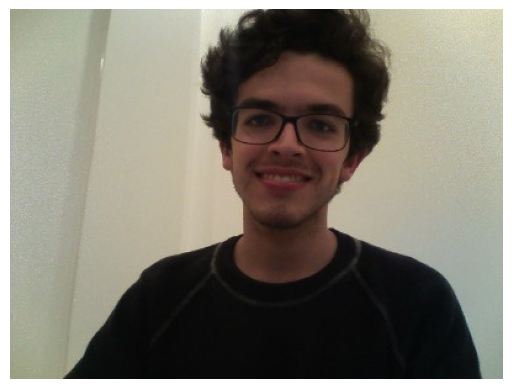

In [2]:
import cv2
import matplotlib.pyplot as plt

def show_image_with_cv2(image):
    cv2.imshow('Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def show_image_with_matplotlib(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Desativar os eixos
    plt.show()

# Caminho para a imagem
image_path = './Material/Material/testes/teste_gabriel.png'

# Carregar a imagem
imagem = cv2.imread(image_path)

# Verificar se a imagem foi carregada corretamente
if imagem is None:
    print(f"Erro ao carregar a imagem no caminho: {image_path}")
else:
    print(f"Imagem carregada com sucesso! Dimensões: {imagem.shape}")
    show_image_with_matplotlib(imagem)


In [3]:
cascade_faces = "./haarcascade_frontalface_default.xml"
caminho_modelo = "./modelo_01_expressoes.keras"
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes =  tf.keras.models.load_model(caminho_modelo)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

if imagem is None:
    print("Erro ao carregar a imagem.")
else:
    # Converter para escala de cinza
    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Detectar faces na imagem
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(20,20))

    # Desenhar retângulos ao redor das faces detectadas
    for (x, y, w, h) in faces:
        cv2.rectangle(imagem, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Mostrar a imagem com as faces detectadas
    cv2.imshow('Faces Detectadas', imagem)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
faces

array([[162,  40, 128, 128]])

In [8]:
len(faces)

1

In [9]:
faces.shape

(1, 4)

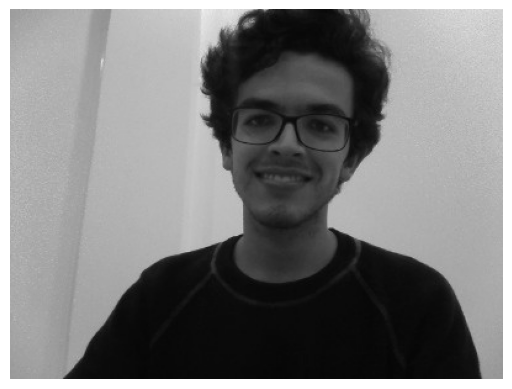

In [11]:
# Exibir imagem com as faces detectadas
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
show_image_with_matplotlib(cinza)

In [12]:
cinza.shape

(300, 400)

In [13]:
# Definir ROI para a primeira face detectada
roi = cinza[40:40 + 128, 162:162 + 128]

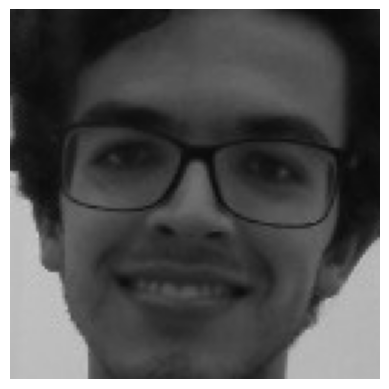

In [15]:
show_image_with_matplotlib(roi)

In [16]:
roi.shape

(128, 128)

In [17]:
roi

array([[ 39,  37,  28, ...,  25,  29,  34],
       [ 34,  32,  25, ...,  24,  24,  29],
       [ 31,  33,  30, ...,  23,  22,  26],
       ...,
       [184, 185, 186, ..., 180, 181, 181],
       [184, 185, 186, ..., 179, 181, 180],
       [184, 185, 187, ..., 180, 181, 180]], dtype=uint8)

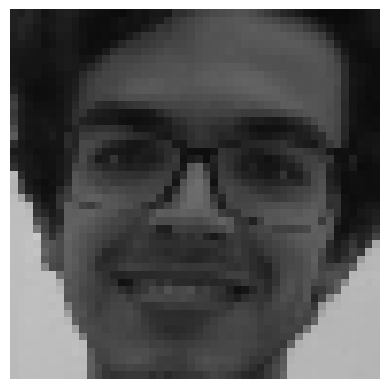

In [18]:
roi = cv2.resize(roi, (48, 48))
show_image_with_matplotlib(roi)

In [19]:
roi.dtype

dtype('uint8')

In [20]:
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [21]:
roi = roi / 255

In [22]:
roi

array([[0.12941176, 0.11372549, 0.14901961, ..., 0.0627451 , 0.08627451,
        0.09803922],
       [0.1254902 , 0.14509804, 0.14509804, ..., 0.0627451 , 0.07843137,
        0.09803922],
       [0.1254902 , 0.14117647, 0.12156863, ..., 0.06666667, 0.08235294,
        0.09803922],
       ...,
       [0.72941176, 0.74117647, 0.74117647, ..., 0.70980392, 0.70980392,
        0.70588235],
       [0.7254902 , 0.7372549 , 0.74117647, ..., 0.70588235, 0.70980392,
        0.70588235],
       [0.7254902 , 0.7372549 , 0.7372549 , ..., 0.70196078, 0.70588235,
        0.70980392]])

In [23]:
roi = img_to_array(roi)

In [24]:
roi.shape

(48, 48, 1)

In [25]:
roi = np.expand_dims(roi, axis = 0)

In [26]:
roi.shape

(1, 48, 48, 1)

In [27]:
preds = classificador_emocoes.predict(roi)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


In [28]:
preds

array([1.7854746e-06, 9.6354707e-14, 6.8995196e-06, 9.8614198e-01,
       7.6421657e-06, 9.2779892e-08, 1.3841585e-02], dtype=float32)

In [29]:
len(preds)

7

In [30]:
emotion_probability = np.max(preds)
emotion_probability

0.986142

In [31]:
preds.argmax()

3

In [32]:
label = expressoes[preds.argmax()]
label

'Feliz'

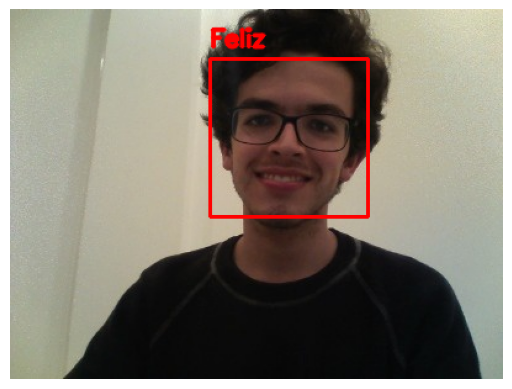

In [34]:
cv2.putText(original, label, (162, 40 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (0, 0, 255), 2)
show_image_with_matplotlib(original)

In [35]:
probabilidades = np.ones((250,300,3), dtype= 'uint8') * 255
probabilidades

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [36]:
probabilidades.shape

(250, 300, 3)

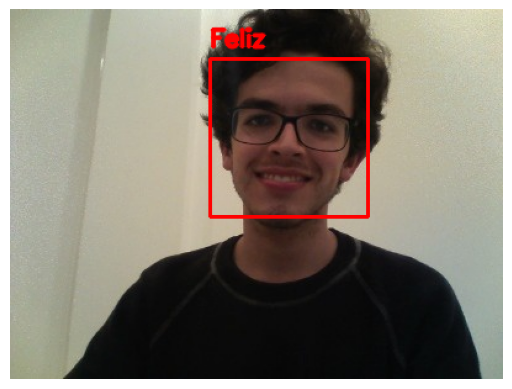

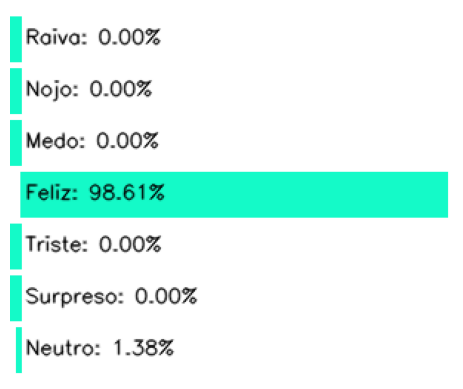

In [38]:
show_image_with_matplotlib(original)
if len(faces) == 1:
  for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
    #print(i, emotion, prob)
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probabilidades, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probabilidades, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
show_image_with_matplotlib(probabilidades)